In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.shape

(100000, 9)

In [6]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [59]:
df2=df.query('diabetes == 1')
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44,0,0,never,19.31,6.5,200,1
26,Male,67,0,1,not current,27.32,6.5,200,1
38,Male,50,1,0,current,27.32,5.7,260,1
40,Male,73,0,0,former,25.91,9.0,160,1
53,Female,53,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65,1,1,never,33.55,8.2,140,1
99938,Male,55,0,1,former,30.42,6.2,300,1
99957,Female,61,0,0,No Info,34.45,6.5,280,1
99962,Female,58,1,0,never,38.31,7.0,200,1


#### 8500 are diabetic and it is imbalance dataset

In [13]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### there is no missing values

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Changing Data Type

In [17]:
df = df.astype({'age': int})

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [36]:
categrorial_features =[]
numerical_features = []
for i in df.columns:
    if df[i].dtype=='O':
        categrorial_features.append(i)
    else: 
        numerical_features.append(i)
       
    


### EDA

#### Univariate Analysis

In [41]:
categrorial_features

['gender', 'smoking_history']

In [42]:
import matplotlib.pyplot as plt

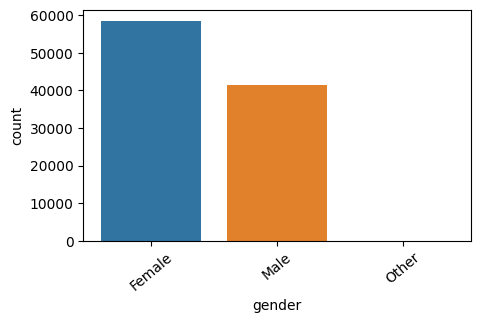

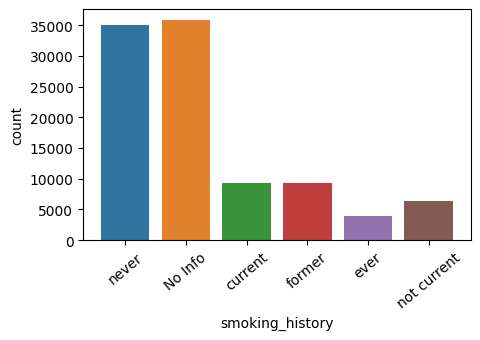

In [57]:
for i in categrorial_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[i])
    plt.xticks(rotation=40)
    plt.plot()
    

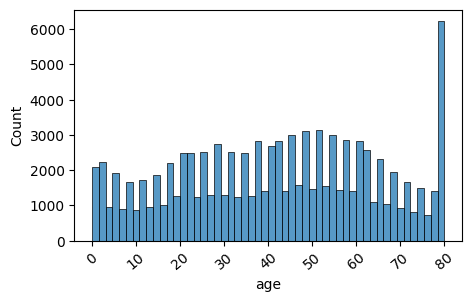

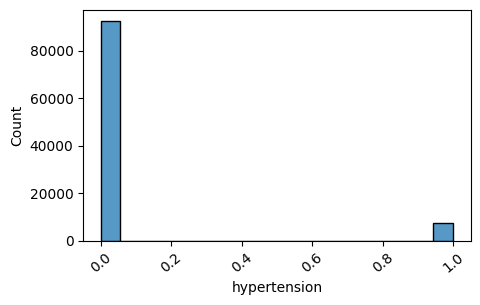

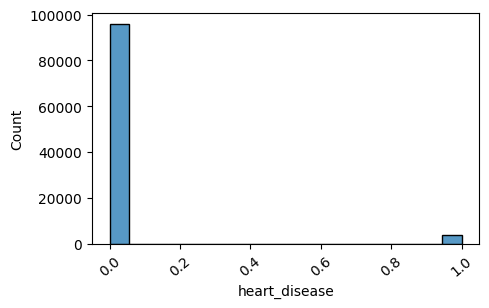

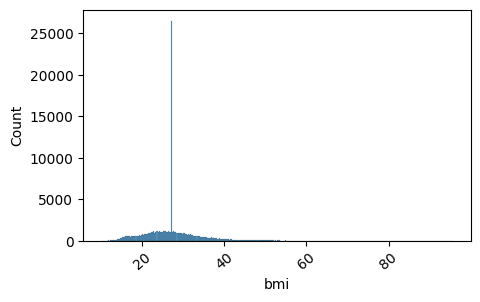

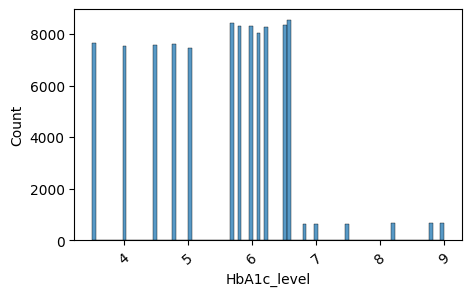

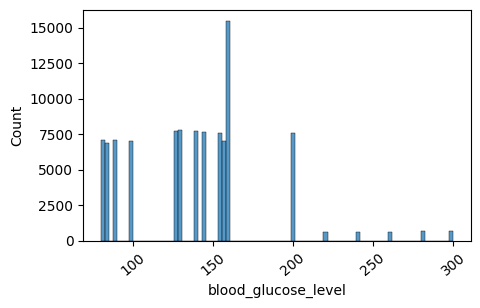

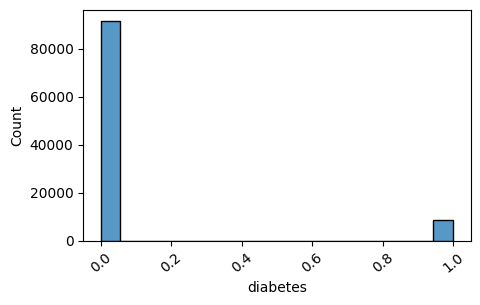

In [58]:
for i in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(x=df[i])
    plt.xticks(rotation=40)
    plt.plot()

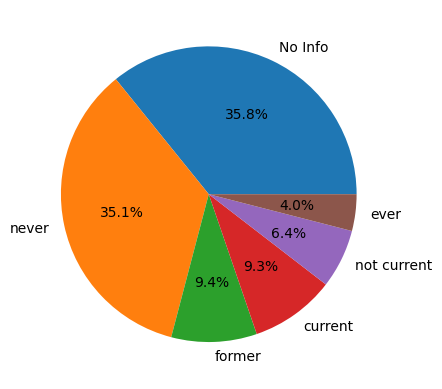

In [60]:

x = df['smoking_history'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

### Bivariate Analysis

In [64]:
categrorial_features


['gender', 'smoking_history']

In [65]:
numerical_features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

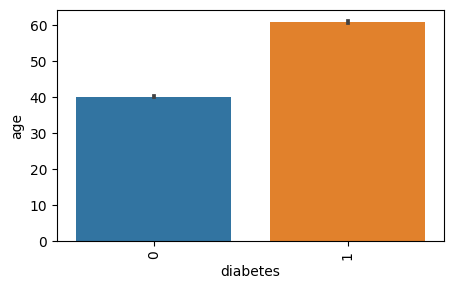

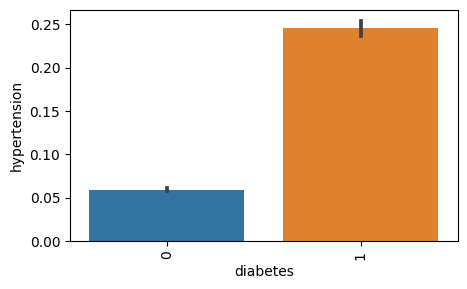

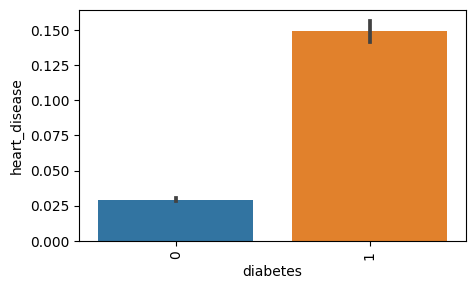

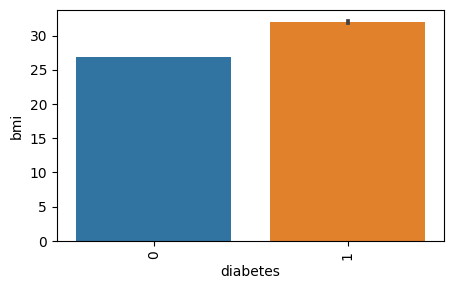

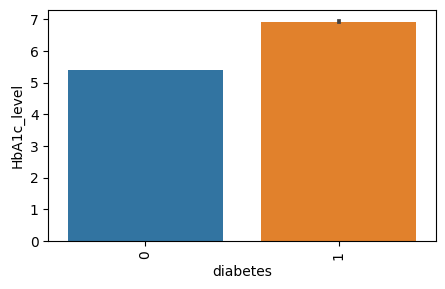

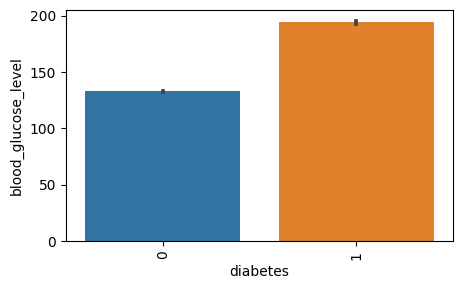

In [73]:
import matplotlib.pyplot as plt
for i in numerical_features[:-1]:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df['diabetes'], y=df[i])
    plt.xticks(rotation=90)
    plt.show()

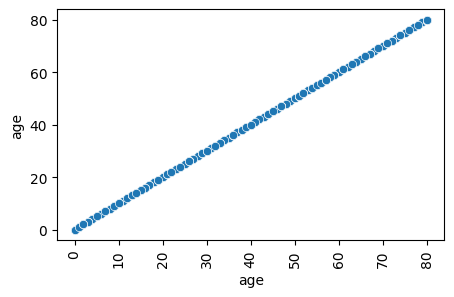

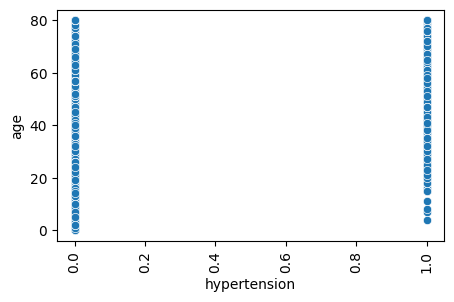

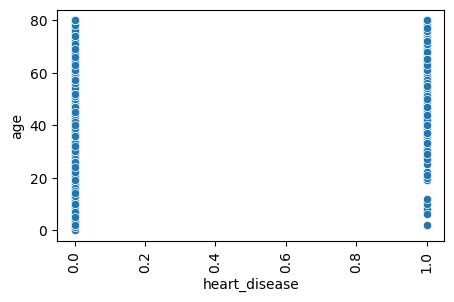

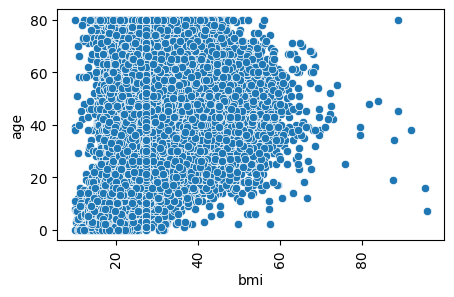

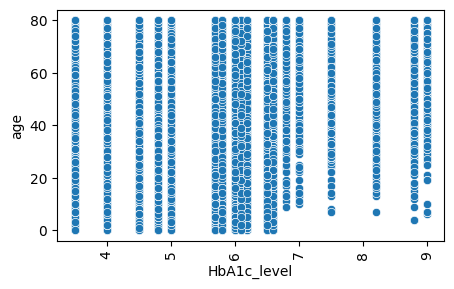

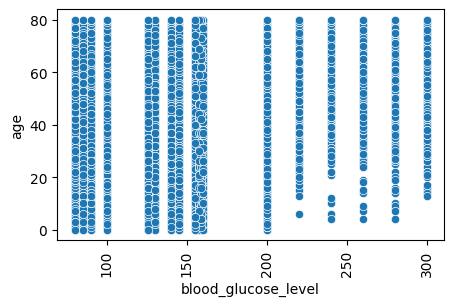

In [74]:
for i in numerical_features[:-1]:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df[i],
                    y=df['age'])
    plt.xticks(rotation=90)
    plt.show()    

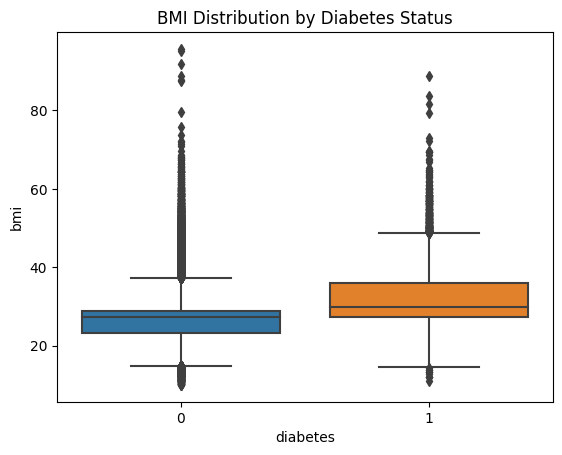

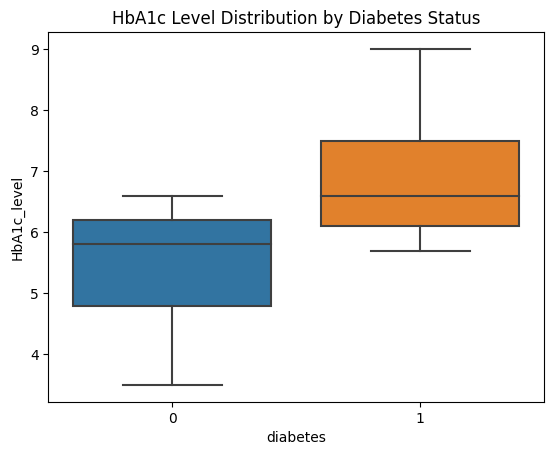

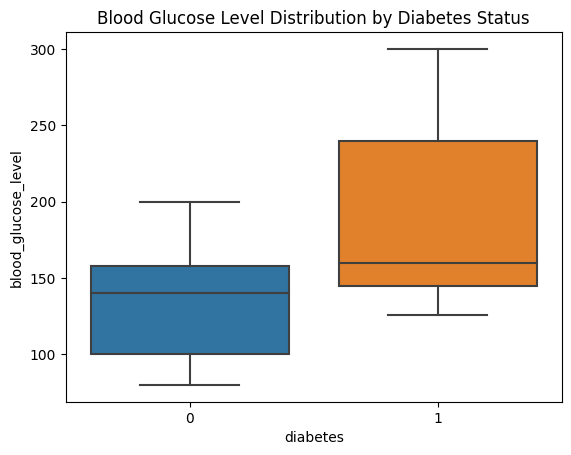

In [78]:
# Highlighting The major factors that causes diabetes using boxplot


sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="HbA1c_level", data=df)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

### The above Boxplots gives us the idea that people having bmi over 30 ,and hbac level over 6 and blood glucose level over 180 are having diabetes

In [101]:
from sklearn.preprocessing import LabelEncoder
label_e = LabelEncoder()

for i in categrorial_features:
    df[i]= label_e.fit_transform(df[i])



In [103]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [105]:
df['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

<Axes: >

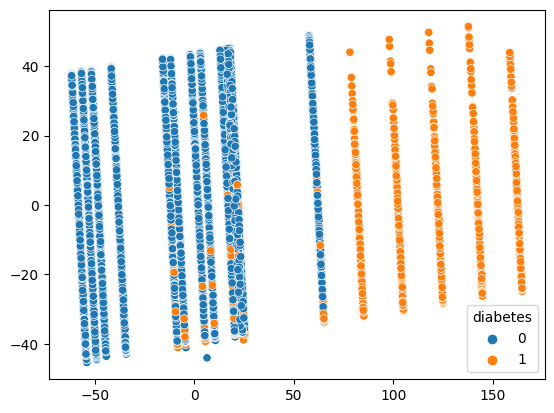

In [106]:
# Multivariate Analysis (PCA)
from sklearn import decomposition

X = df.drop('diabetes',axis=1)
y = df['diabetes']
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

### It is imbalance data set 

In [116]:
### Smote 

In [117]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [118]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']


In [119]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


In [121]:
y_train.value_counts()


diabetes
0    73200
1    73200
Name: count, dtype: int64

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model  = rf.fit(X_train,y_train)


In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 


In [125]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17832   468]
 [  456 17844]]
0.9747540983606557
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.97      0.98      0.97     18300

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



### Hyperparameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#### Grid Search CV 

In [129]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [130]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


In [132]:
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=150)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18288
           1       0.98      0.97      0.97     18312

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [133]:
import pickle

pickle.dump(model,open('venu.pkl','wb'))

In [134]:
pickle.load(open('venu.pkl','rb'))

RandomForestClassifier()